<a href="https://colab.research.google.com/github/suryakiran594/DS/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

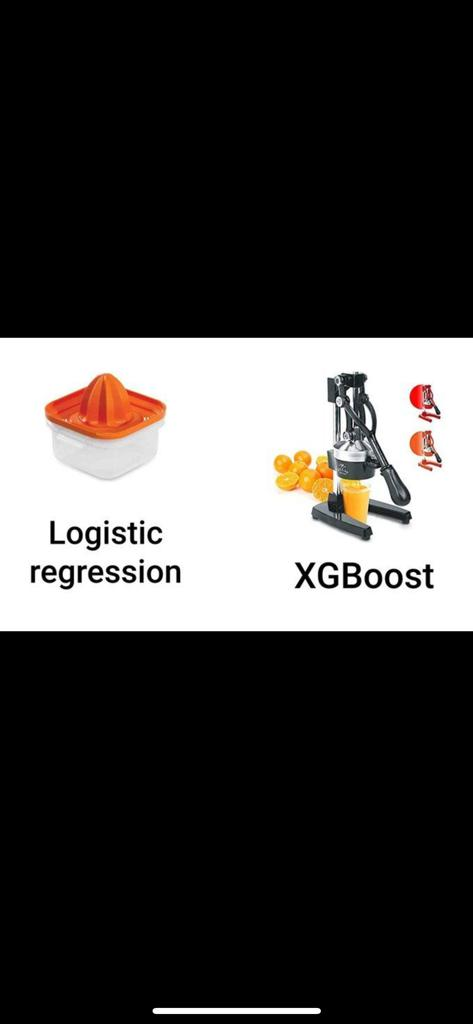

In [2]:
import xgboost

In [4]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.7 MB/s eta 0:00:00


In [63]:
import optuna
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [7]:
df=pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [16]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
#Fill the null values with median
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].median())
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].median())
df['University Rating']=df['University Rating'].fillna(df['University Rating'].median())

In [18]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [19]:
#dropping serial no & chance of admit (target column)
X=df.drop(['Serial No.','Chance of Admit'],axis=1)

In [21]:
y=df['Chance of Admit']

In [23]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


In [24]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [25]:
# Train Test Split -- do this before standardization inorder to avoid data leakage

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=25)

In [26]:
X_train.shape

(375, 7)

In [27]:
X_test.shape

(125, 7)

In [28]:
y_train.shape

(375,)

In [29]:
y_test.shape

(125,)

In [31]:
#Let`s Standardize the data

std_sca=StandardScaler()
X_train=std_sca.fit_transform(X_train)

In [32]:
X_train.shape

(375, 7)

In [33]:
X_test=std_sca.transform(X_test)

In [34]:
X_test.shape

(125, 7)

In [37]:
!nvidia-smi                            # which GPU colab using?

Sun May 21 11:22:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
print(X)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0        337.0        118.0                4.0  4.5  4.5  9.65         1
1        324.0        107.0                4.0  4.0  4.5  8.87         1
2        317.0        104.0                3.0  3.0  3.5  8.00         1
3        322.0        110.0                3.0  3.5  2.5  8.67         1
4        314.0        103.0                2.0  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
495      332.0        108.0                5.0  4.5  4.0  9.02         1
496      337.0        117.0                5.0  5.0  5.0  9.87         1
497      330.0        120.0                5.0  4.5  5.0  9.56         1
498      312.0        103.0                4.0  4.0  5.0  8.43         0
499      327.0        113.0                4.0  4.5  4.5  9.04         0

[500 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497 

In [70]:
# Write Code for Optuna
## Refer Optuna Documentation

def objective(trail,data=X,target=y):    # passing input and output variable  # trail-bassian approach picks hyper params randomly
  train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=.25,random_state=30) # train test split
  param={
      'tree_method':'gpu_hist',
      'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),      
      'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),
      'colsample_bytree':trail.suggest_categorical('colsample_bytree',[.1,.2,.3,.4,.5,.6,.8,.9,1]),
      'subsample':trail.suggest_categorical('subsample',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
      'learning_rate':trail.suggest_categorical('learning_rate',[.00001,.0003,.008,.02,.01,1,8]),
      'n_estimator':300,
      'max_depth':trail.suggest_categorical('max_depth',[3,4,5,6,7,8,9,10,11,12]),
      'random_state':trail.suggest_categorical('random_state',[10,20,30,2000,3454,243123]),
      'min_child_weight':trail.suggest_int('min_child_weight',1,200)  
       }
  Xgb_reg_model= xgb.XGBRegressor(**param)
  Xgb_reg_model.fit(train_x,train_y,eval_set=[(test_x,test_y)],verbose=True)
  pred_xgb=Xgb_reg_model.predict(test_x)
  mse=mean_squared_error(test_y,pred_xgb)
  return mse
                                                   

In [71]:
 find_params=optuna.create_study()
 find_params.optimize(objective,n_trials=10)
 find_params.best_trial.params

[I 2023-05-21 11:57:29,092] A new study created in memory with name: no-name-bd201e10-99a0-40e3-9147-ad57f226b992
<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[11:57:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25754
[1]	validation_0-rmse:0.25754
[2]	validation_0-rmse:0.25754
[3]	validation_0-rmse:0.25754
[4]	validation_0-rmse:0.25754
[5]	validation_0-rmse:0.25754
[6]	validation_0-rmse:0.25754
[7]	validation_0-rmse:0.25754
[8]	validation_0-rmse:0.25754
[9]	validation_0-rmse:0.25754
[10]	validation_0-rmse:0.25754
[11]	validation_0-rmse:0.25754
[12]	validation_0-rmse:0.25754
[13]	validation_0-rmse:0.25754
[14]	validation_0-rmse:0.25754
[15]	validation_0-rmse:0.25754
[16]	validation_0-rmse:0.25754
[17]	validation_0-rmse:0.25754
[18]	validation_0-rmse:0.25754
[19]	validation_0-rmse:0.25754
[20]	validation_0-rmse:0.25754
[21]	validation_0-rmse:0.25754
[22]	validation_0-rmse:0.25754
[23]	validation_0-rmse:0.25754
[24]	validation_0-rmse:0.25754
[25]	validation_0-rmse:0.25754
[26]	validation_0-rmse:0.25754
[27]	validation_0-rmse:0.25754
[28]	validation_0-rmse:0.25754
[29]	validation_0-rmse

[I 2023-05-21 11:57:30,485] Trial 0 finished with value: 0.0663272 and parameters: {'lambda': 0.0009761134836319206, 'alpha': 0.00017376139661836153, 'colsample_bytree': 1, 'subsample': 0.3, 'learning_rate': 0.02, 'max_depth': 3, 'random_state': 30, 'min_child_weight': 141}. Best is trial 0 with value: 0.0663272.


[11:57:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25328
[1]	validation_0-rmse:0.24892
[2]	validation_0-rmse:0.24482
[3]	validation_0-rmse:0.24061
[4]	validation_0-rmse:0.23661
[5]	validation_0-rmse:0.23271
[6]	validation_0-rmse:0.22898
[7]	validation_0-rmse:0.22537
[8]	validation_0-rmse:0.22172
[9]	validation_0-rmse:0.21810
[10]	validation_0-rmse:0.21462
[11]	validation_0-rmse:0.21115
[12]	validation_0-rmse:0.20776
[13]	validation_0-rmse:0.20451
[14]	validation_0-rmse:0.20130
[15]	validation_0-rmse:0.19820
[16]	validation_0-rmse:0.19516
[17]	validation_0-rmse:0.19214
[18]	validation_0-rmse:0.18938
[19]	validation_0-rmse:0.18647
[20]	validation_0-rmse:0.18352
[21]	validation_0-rmse:0.18079
[22]	validation_0-rmse:0.17807
[23]	validation_0-rmse:0.17541
[24]	validation_0-rmse:0.17336
[25]	validation_0-rmse:0.17076
[26]	validation_0-rmse:0.16853
[27]	validation_0-rmse:0.16639
[28]	validation_0-rmse:0.16408
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[49]	validation_0-rmse:0.13241
[50]	validation_0-rmse:0.13132
[51]	validation_0-rmse:0.13029
[52]	validation_0-rmse:0.12917
[53]	validation_0-rmse:0.12814
[54]	validation_0-rmse:0.12716
[55]	validation_0-rmse:0.12634
[56]	validation_0-rmse:0.12559
[57]	validation_0-rmse:0.12468
[58]	validation_0-rmse:0.12385
[59]	validation_0-rmse:0.12319
[60]	validation_0-rmse:0.12225
[61]	validation_0-rmse:0.12160
[62]	validation_0-rmse:0.12083
[63]	validation_0-rmse:0.11974
[64]	validation_0-rmse:0.11883
[65]	validation_0-rmse:0.11787
[66]	validation_0-rmse:0.11706
[67]	validation_0-rmse:0.11637
[68]	validation_0-rmse:0.11589
[69]	validation_0-rmse:0.11525
[70]	validation_0-rmse:0.11475
[71]	validation_0-rmse:0.11414
[72]	validation_0-rmse:0.11372
[73]	validation_0-rmse:0.11282
[74]	validation_0-rmse:0.11229
[75]	validation_0-rmse:0.11180
[76]	validation_0-rmse:0.11114
[77]	validation_0-rmse:0.11023
[78]	validation_0-rmse:0.10978
[79]	validation_0-rmse:0.10947
[80]	validation_0-rmse:0.10915
[81]	val

[I 2023-05-21 11:57:30,890] Trial 1 finished with value: 0.010588446511332518 and parameters: {'lambda': 0.0011506698514512819, 'alpha': 0.8820538093371164, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 20, 'min_child_weight': 124}. Best is trial 1 with value: 0.010588446511332518.


[11:57:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25575
[1]	validation_0-rmse:0.25401
[2]	validation_0-rmse:0.25228
[3]	validation_0-rmse:0.25061
[4]	validation_0-rmse:0.24889
[5]	validation_0-rmse:0.24720
[6]	validation_0-rmse:0.24551
[7]	validation_0-rmse:0.24397
[8]	validation_0-rmse:0.24242
[9]	validation_0-rmse:0.24083
[10]	validation_0-rmse:0.23924
[11]	validation_0-rmse:0.23771
[12]	validation_0-rmse:0.23624
[13]	validation_0-rmse:0.23481
[14]	validation_0-rmse:0.23336
[15]	validation_0-rmse:0.23192
[16]	validation_0-rmse:0.23046
[17]	validation_0-rmse:0.22898
[18]	validation_0-rmse:0.22760
[19]	validation_0-rmse:0.22623
[20]	validation_0-rmse:0.22487
[21]	validation_0-rmse:0.22352
[22]	validation_0-rmse:0.22222
[23]	validation_0-rmse:0.22089
[24]	validation_0-rmse:0.21954
[25]	validation_0-rmse:0.21825
[26]	validation_0-rmse:0.21690
[27]	validation_0-rmse:0.21562
[28]	validation_0-rmse:0.21437
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[58]	validation_0-rmse:0.18484
[59]	validation_0-rmse:0.18405
[60]	validation_0-rmse:0.18322
[61]	validation_0-rmse:0.18246
[62]	validation_0-rmse:0.18172
[63]	validation_0-rmse:0.18101
[64]	validation_0-rmse:0.18033
[65]	validation_0-rmse:0.17970
[66]	validation_0-rmse:0.17902
[67]	validation_0-rmse:0.17839
[68]	validation_0-rmse:0.17778
[69]	validation_0-rmse:0.17714
[70]	validation_0-rmse:0.17658
[71]	validation_0-rmse:0.17596
[72]	validation_0-rmse:0.17533
[73]	validation_0-rmse:0.17470
[74]	validation_0-rmse:0.17410
[75]	validation_0-rmse:0.17350
[76]	validation_0-rmse:0.17295
[77]	validation_0-rmse:0.17237
[78]	validation_0-rmse:0.17181
[79]	validation_0-rmse:0.17127
[80]	validation_0-rmse:0.17075
[81]	validation_0-rmse:0.17022
[82]	validation_0-rmse:0.16964
[83]	validation_0-rmse:0.16910
[84]	validation_0-rmse:0.16855
[85]	validation_0-rmse:0.16809
[86]	validation_0-rmse:0.16762
[87]	validation_0-rmse:0.16712
[88]	validation_0-rmse:0.16666
[89]	validation_0-rmse:0.16623
[90]	val

[I 2023-05-21 11:57:31,238] Trial 2 finished with value: 0.02627834786845084 and parameters: {'lambda': 6.761703853672679, 'alpha': 0.0005580687050279984, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 30, 'min_child_weight': 160}. Best is trial 1 with value: 0.010588446511332518.


[11:57:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:1.60336
[1]	validation_0-rmse:10.85858
[2]	validation_0-rmse:69.59605
[3]	validation_0-rmse:471.90094
[4]	validation_0-rmse:3275.05843
[5]	validation_0-rmse:22726.32197
[6]	validation_0-rmse:157681.04246
[7]	validation_0-rmse:1093108.12921
[8]	validation_0-rmse:7582532.80579
[9]	validation_0-rmse:52621470.93872
[10]	validation_0-rmse:364793733.27313
[11]	validation_0-rmse:2530453532.54185
[12]	validation_0-rmse:17554583836.01189
[13]	validation_0-rmse:121708756750.55229
[14]	validation_0-rmse:844372890129.09668
[15]	validation_0-rmse:5857414688116.52637
[16]	validation_0-rmse:40601525087293.07031
[17]	validation_0-rmse:281779720865756.56250
[18]	validation_0-rmse:1954518540674303.25000
[19]	validation_0-rmse:13551711640907728.00000
[20]	validation_0-rmse:94008227611443312.00000
[21]	validation_0-rmse:652008759996808448.00000
[22]	validation_0-rmse:4481839671430996992.00000
[23

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[49]	validation_0-rmse:inf
[50]	validation_0-rmse:inf
[51]	validation_0-rmse:inf
[52]	validation_0-rmse:inf
[53]	validation_0-rmse:inf
[54]	validation_0-rmse:inf
[55]	validation_0-rmse:inf
[56]	validation_0-rmse:inf
[57]	validation_0-rmse:inf
[58]	validation_0-rmse:inf
[59]	validation_0-rmse:inf
[60]	validation_0-rmse:inf
[61]	validation_0-rmse:inf
[62]	validation_0-rmse:inf
[63]	validation_0-rmse:inf
[64]	validation_0-rmse:inf
[65]	validation_0-rmse:inf
[66]	validation_0-rmse:inf
[67]	validation_0-rmse:inf
[68]	validation_0-rmse:inf
[69]	validation_0-rmse:inf
[70]	validation_0-rmse:inf
[71]	validation_0-rmse:inf
[72]	validation_0-rmse:inf
[73]	validation_0-rmse:inf
[74]	validation_0-rmse:inf
[75]	validation_0-rmse:inf
[76]	validation_0-rmse:inf
[77]	validation_0-rmse:inf
[78]	validation_0-rmse:inf
[79]	validation_0-rmse:inf
[80]	validation_0-rmse:inf
[81]	validation_0-rmse:inf
[82]	validation_0-rmse:inf
[83]	validation_0-rmse:inf
[84]	validation_0-rmse:inf
[85]	validation_0-rmse:inf
[

[I 2023-05-21 11:57:31,620] Trial 3 finished with value: 1.984608349094989e+74 and parameters: {'lambda': 1.5081233107226935, 'alpha': 0.0015795425680207847, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 8, 'max_depth': 12, 'random_state': 3454, 'min_child_weight': 79}. Best is trial 1 with value: 0.010588446511332518.


[11:57:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25754
[1]	validation_0-rmse:0.25754
[2]	validation_0-rmse:0.25754
[3]	validation_0-rmse:0.25754
[4]	validation_0-rmse:0.25754
[5]	validation_0-rmse:0.25754
[6]	validation_0-rmse:0.25754
[7]	validation_0-rmse:0.25754
[8]	validation_0-rmse:0.25754
[9]	validation_0-rmse:0.25754
[10]	validation_0-rmse:0.25754
[11]	validation_0-rmse:0.25754
[12]	validation_0-rmse:0.25754
[13]	validation_0-rmse:0.25754
[14]	validation_0-rmse:0.25754
[15]	validation_0-rmse:0.25754
[16]	validation_0-rmse:0.25754
[17]	validation_0-rmse:0.25754
[18]	validation_0-rmse:0.25754
[19]	validation_0-rmse:0.25754
[20]	validation_0-rmse:0.25754
[21]	validation_0-rmse:0.25754
[22]	validation_0-rmse:0.25754
[23]	validation_0-rmse:0.25754
[24]	validation_0-rmse:0.25754
[25]	validation_0-rmse:0.25754
[26]	validation_0-rmse:0.25754
[27]	validation_0-rmse:0.25754
[28]	validation_0-rmse:0.25754
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[56]	validation_0-rmse:0.25754
[57]	validation_0-rmse:0.25754
[58]	validation_0-rmse:0.25754
[59]	validation_0-rmse:0.25754
[60]	validation_0-rmse:0.25754
[61]	validation_0-rmse:0.25754
[62]	validation_0-rmse:0.25754
[63]	validation_0-rmse:0.25754
[64]	validation_0-rmse:0.25754
[65]	validation_0-rmse:0.25754
[66]	validation_0-rmse:0.25754
[67]	validation_0-rmse:0.25754
[68]	validation_0-rmse:0.25754
[69]	validation_0-rmse:0.25754
[70]	validation_0-rmse:0.25754
[71]	validation_0-rmse:0.25754
[72]	validation_0-rmse:0.25754
[73]	validation_0-rmse:0.25754
[74]	validation_0-rmse:0.25754
[75]	validation_0-rmse:0.25754
[76]	validation_0-rmse:0.25754
[77]	validation_0-rmse:0.25754
[78]	validation_0-rmse:0.25754
[79]	validation_0-rmse:0.25754
[80]	validation_0-rmse:0.25754
[81]	validation_0-rmse:0.25754
[82]	validation_0-rmse:0.25754
[83]	validation_0-rmse:0.25754
[84]	validation_0-rmse:0.25754
[85]	validation_0-rmse:0.25754
[86]	validation_0-rmse:0.25754
[87]	validation_0-rmse:0.25754
[88]	val

[I 2023-05-21 11:57:31,963] Trial 4 finished with value: 0.0663272 and parameters: {'lambda': 0.006968075106737433, 'alpha': 0.0018914430505944727, 'colsample_bytree': 0.2, 'subsample': 0.1, 'learning_rate': 0.008, 'max_depth': 6, 'random_state': 2000, 'min_child_weight': 153}. Best is trial 1 with value: 0.010588446511332518.


[11:57:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25754
[1]	validation_0-rmse:0.25754
[2]	validation_0-rmse:0.25754
[3]	validation_0-rmse:0.25754
[4]	validation_0-rmse:0.25754
[5]	validation_0-rmse:0.25754
[6]	validation_0-rmse:0.25754
[7]	validation_0-rmse:0.25754
[8]	validation_0-rmse:0.25754
[9]	validation_0-rmse:0.25754
[10]	validation_0-rmse:0.25754
[11]	validation_0-rmse:0.25754
[12]	validation_0-rmse:0.25754
[13]	validation_0-rmse:0.25754
[14]	validation_0-rmse:0.25754
[15]	validation_0-rmse:0.25754
[16]	validation_0-rmse:0.25754
[17]	validation_0-rmse:0.25754
[18]	validation_0-rmse:0.25754
[19]	validation_0-rmse:0.25754
[20]	validation_0-rmse:0.25754
[21]	validation_0-rmse:0.25754
[22]	validation_0-rmse:0.25754
[23]	validation_0-rmse:0.25754
[24]	validation_0-rmse:0.25754
[25]	validation_0-rmse:0.25754
[26]	validation_0-rmse:0.25754
[27]	validation_0-rmse:0.25754
[28]	validation_0-rmse:0.25754
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[46]	validation_0-rmse:0.25754
[47]	validation_0-rmse:0.25754
[48]	validation_0-rmse:0.25754
[49]	validation_0-rmse:0.25754
[50]	validation_0-rmse:0.25754
[51]	validation_0-rmse:0.25754
[52]	validation_0-rmse:0.25754
[53]	validation_0-rmse:0.25754
[54]	validation_0-rmse:0.25754
[55]	validation_0-rmse:0.25754
[56]	validation_0-rmse:0.25754
[57]	validation_0-rmse:0.25754
[58]	validation_0-rmse:0.25754
[59]	validation_0-rmse:0.25754
[60]	validation_0-rmse:0.25754
[61]	validation_0-rmse:0.25754
[62]	validation_0-rmse:0.25754
[63]	validation_0-rmse:0.25754
[64]	validation_0-rmse:0.25754
[65]	validation_0-rmse:0.25754
[66]	validation_0-rmse:0.25754
[67]	validation_0-rmse:0.25754
[68]	validation_0-rmse:0.25754
[69]	validation_0-rmse:0.25754
[70]	validation_0-rmse:0.25754
[71]	validation_0-rmse:0.25754
[72]	validation_0-rmse:0.25754
[73]	validation_0-rmse:0.25754
[74]	validation_0-rmse:0.25754
[75]	validation_0-rmse:0.25754
[76]	validation_0-rmse:0.25754
[77]	validation_0-rmse:0.25754
[78]	val

[I 2023-05-21 11:57:32,345] Trial 5 finished with value: 0.0663272 and parameters: {'lambda': 0.13374715539903728, 'alpha': 0.0008929071640325144, 'colsample_bytree': 0.5, 'subsample': 0.1, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 147}. Best is trial 1 with value: 0.010588446511332518.


[11:57:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25754
[1]	validation_0-rmse:0.25754
[2]	validation_0-rmse:0.25754
[3]	validation_0-rmse:0.25754
[4]	validation_0-rmse:0.25754
[5]	validation_0-rmse:0.25754
[6]	validation_0-rmse:0.25754
[7]	validation_0-rmse:0.25754
[8]	validation_0-rmse:0.25754
[9]	validation_0-rmse:0.25754
[10]	validation_0-rmse:0.25754
[11]	validation_0-rmse:0.25754
[12]	validation_0-rmse:0.25754
[13]	validation_0-rmse:0.25754
[14]	validation_0-rmse:0.25754
[15]	validation_0-rmse:0.25754
[16]	validation_0-rmse:0.25754
[17]	validation_0-rmse:0.25754
[18]	validation_0-rmse:0.25754
[19]	validation_0-rmse:0.25754
[20]	validation_0-rmse:0.25754
[21]	validation_0-rmse:0.25754
[22]	validation_0-rmse:0.25754
[23]	validation_0-rmse:0.25754
[24]	validation_0-rmse:0.25754
[25]	validation_0-rmse:0.25754
[26]	validation_0-rmse:0.25754
[27]	validation_0-rmse:0.25754
[28]	validation_0-rmse:0.25754
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[53]	validation_0-rmse:0.25754
[54]	validation_0-rmse:0.25754
[55]	validation_0-rmse:0.25754
[56]	validation_0-rmse:0.25754
[57]	validation_0-rmse:0.25754
[58]	validation_0-rmse:0.25754
[59]	validation_0-rmse:0.25754
[60]	validation_0-rmse:0.25754
[61]	validation_0-rmse:0.25754
[62]	validation_0-rmse:0.25754
[63]	validation_0-rmse:0.25754
[64]	validation_0-rmse:0.25754
[65]	validation_0-rmse:0.25754
[66]	validation_0-rmse:0.25754
[67]	validation_0-rmse:0.25754
[68]	validation_0-rmse:0.25754
[69]	validation_0-rmse:0.25754
[70]	validation_0-rmse:0.25754
[71]	validation_0-rmse:0.25754
[72]	validation_0-rmse:0.25754
[73]	validation_0-rmse:0.25754
[74]	validation_0-rmse:0.25754
[75]	validation_0-rmse:0.25754
[76]	validation_0-rmse:0.25754
[77]	validation_0-rmse:0.25754
[78]	validation_0-rmse:0.25754
[79]	validation_0-rmse:0.25754
[80]	validation_0-rmse:0.25754
[81]	validation_0-rmse:0.25754
[82]	validation_0-rmse:0.25754
[83]	validation_0-rmse:0.25754
[84]	validation_0-rmse:0.25754
[85]	val

[I 2023-05-21 11:57:32,693] Trial 6 finished with value: 0.0663272 and parameters: {'lambda': 0.035685050784226915, 'alpha': 0.0012018373386516422, 'colsample_bytree': 0.1, 'subsample': 0.1, 'learning_rate': 0.02, 'max_depth': 12, 'random_state': 2000, 'min_child_weight': 150}. Best is trial 1 with value: 0.010588446511332518.


[11:57:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25754
[1]	validation_0-rmse:0.25754
[2]	validation_0-rmse:0.25754
[3]	validation_0-rmse:0.25754
[4]	validation_0-rmse:0.25754
[5]	validation_0-rmse:0.25754
[6]	validation_0-rmse:0.25754
[7]	validation_0-rmse:0.25754
[8]	validation_0-rmse:0.25754
[9]	validation_0-rmse:0.25754
[10]	validation_0-rmse:0.25754
[11]	validation_0-rmse:0.25754
[12]	validation_0-rmse:0.25754
[13]	validation_0-rmse:0.25754
[14]	validation_0-rmse:0.25754
[15]	validation_0-rmse:0.25754
[16]	validation_0-rmse:0.25754
[17]	validation_0-rmse:0.25754
[18]	validation_0-rmse:0.25754
[19]	validation_0-rmse:0.25754
[20]	validation_0-rmse:0.25754
[21]	validation_0-rmse:0.25754
[22]	validation_0-rmse:0.25754
[23]	validation_0-rmse:0.25754
[24]	validation_0-rmse:0.25754
[25]	validation_0-rmse:0.25754
[26]	validation_0-rmse:0.25754
[27]	validation_0-rmse:0.25754
[28]	validation_0-rmse:0.25754
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[49]	validation_0-rmse:0.25754
[50]	validation_0-rmse:0.25754
[51]	validation_0-rmse:0.25754
[52]	validation_0-rmse:0.25754
[53]	validation_0-rmse:0.25754
[54]	validation_0-rmse:0.25754
[55]	validation_0-rmse:0.25754
[56]	validation_0-rmse:0.25754
[57]	validation_0-rmse:0.25754
[58]	validation_0-rmse:0.25754
[59]	validation_0-rmse:0.25754
[60]	validation_0-rmse:0.25754
[61]	validation_0-rmse:0.25754
[62]	validation_0-rmse:0.25754
[63]	validation_0-rmse:0.25754
[64]	validation_0-rmse:0.25754
[65]	validation_0-rmse:0.25754
[66]	validation_0-rmse:0.25754
[67]	validation_0-rmse:0.25754
[68]	validation_0-rmse:0.25754
[69]	validation_0-rmse:0.25754
[70]	validation_0-rmse:0.25754
[71]	validation_0-rmse:0.25754
[72]	validation_0-rmse:0.25754
[73]	validation_0-rmse:0.25754
[74]	validation_0-rmse:0.25754
[75]	validation_0-rmse:0.25754
[76]	validation_0-rmse:0.25754
[77]	validation_0-rmse:0.25754
[78]	validation_0-rmse:0.25754
[79]	validation_0-rmse:0.25754
[80]	validation_0-rmse:0.25754
[81]	val

[I 2023-05-21 11:57:33,079] Trial 7 finished with value: 0.0663272 and parameters: {'lambda': 0.5522065019699838, 'alpha': 0.000314563960871236, 'colsample_bytree': 0.2, 'subsample': 0.2, 'learning_rate': 0.01, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 164}. Best is trial 1 with value: 0.010588446511332518.


[11:57:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.08827
[1]	validation_0-rmse:0.07480
[2]	validation_0-rmse:0.07211
[3]	validation_0-rmse:0.07153
[4]	validation_0-rmse:0.07073
[5]	validation_0-rmse:0.07296
[6]	validation_0-rmse:0.07122
[7]	validation_0-rmse:0.07113
[8]	validation_0-rmse:0.06838
[9]	validation_0-rmse:0.06749
[10]	validation_0-rmse:0.06862
[11]	validation_0-rmse:0.07025
[12]	validation_0-rmse:0.07058
[13]	validation_0-rmse:0.06944
[14]	validation_0-rmse:0.06990
[15]	validation_0-rmse:0.07174
[16]	validation_0-rmse:0.07605
[17]	validation_0-rmse:0.07419
[18]	validation_0-rmse:0.07410
[19]	validation_0-rmse:0.07227
[20]	validation_0-rmse:0.07140
[21]	validation_0-rmse:0.07126
[22]	validation_0-rmse:0.07173
[23]	validation_0-rmse:0.07275
[24]	validation_0-rmse:0.07075
[25]	validation_0-rmse:0.07054
[26]	validation_0-rmse:0.07004
[27]	validation_0-rmse:0.07108
[28]	validation_0-rmse:0.07268
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[35]	validation_0-rmse:0.07107
[36]	validation_0-rmse:0.07033
[37]	validation_0-rmse:0.07288
[38]	validation_0-rmse:0.07305
[39]	validation_0-rmse:0.07546
[40]	validation_0-rmse:0.07344
[41]	validation_0-rmse:0.07259
[42]	validation_0-rmse:0.07180
[43]	validation_0-rmse:0.07171
[44]	validation_0-rmse:0.07270
[45]	validation_0-rmse:0.07656
[46]	validation_0-rmse:0.07527
[47]	validation_0-rmse:0.07493
[48]	validation_0-rmse:0.07286
[49]	validation_0-rmse:0.07386
[50]	validation_0-rmse:0.07236
[51]	validation_0-rmse:0.07223
[52]	validation_0-rmse:0.07195
[53]	validation_0-rmse:0.07320
[54]	validation_0-rmse:0.07396
[55]	validation_0-rmse:0.07435
[56]	validation_0-rmse:0.07633
[57]	validation_0-rmse:0.07542
[58]	validation_0-rmse:0.07453
[59]	validation_0-rmse:0.07435
[60]	validation_0-rmse:0.07482
[61]	validation_0-rmse:0.07362
[62]	validation_0-rmse:0.07282
[63]	validation_0-rmse:0.07676
[64]	validation_0-rmse:0.07690
[65]	validation_0-rmse:0.07806
[66]	validation_0-rmse:0.07729
[67]	val

[I 2023-05-21 11:57:33,550] Trial 8 finished with value: 0.006164029747305823 and parameters: {'lambda': 9.072415080089147, 'alpha': 0.0023694477522015586, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 37}. Best is trial 8 with value: 0.006164029747305823.


[11:57:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.25279
[1]	validation_0-rmse:0.24831
[2]	validation_0-rmse:0.24367
[3]	validation_0-rmse:0.23934
[4]	validation_0-rmse:0.23488
[5]	validation_0-rmse:0.23068
[6]	validation_0-rmse:0.22691
[7]	validation_0-rmse:0.22284
[8]	validation_0-rmse:0.21887
[9]	validation_0-rmse:0.21484
[10]	validation_0-rmse:0.21113
[11]	validation_0-rmse:0.20777
[12]	validation_0-rmse:0.20411
[13]	validation_0-rmse:0.20086
[14]	validation_0-rmse:0.19743
[15]	validation_0-rmse:0.19386
[16]	validation_0-rmse:0.19037
[17]	validation_0-rmse:0.18729
[18]	validation_0-rmse:0.18408
[19]	validation_0-rmse:0.18126
[20]	validation_0-rmse:0.17805
[21]	validation_0-rmse:0.17517
[22]	validation_0-rmse:0.17210
[23]	validation_0-rmse:0.16936
[24]	validation_0-rmse:0.16644
[25]	validation_0-rmse:0.16384
[26]	validation_0-rmse:0.16104
[27]	validation_0-rmse:0.15849
[28]	validation_0-rmse:0.15590
[29]	validation_0-rmse

<ipython-input-70-9ca5f08f0e97>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-70-9ca5f08f0e97>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[40]	validation_0-rmse:0.13005
[41]	validation_0-rmse:0.12808
[42]	validation_0-rmse:0.12646
[43]	validation_0-rmse:0.12471
[44]	validation_0-rmse:0.12291
[45]	validation_0-rmse:0.12138
[46]	validation_0-rmse:0.11960
[47]	validation_0-rmse:0.11806
[48]	validation_0-rmse:0.11636
[49]	validation_0-rmse:0.11497
[50]	validation_0-rmse:0.11336
[51]	validation_0-rmse:0.11180
[52]	validation_0-rmse:0.11052
[53]	validation_0-rmse:0.10903
[54]	validation_0-rmse:0.10759
[55]	validation_0-rmse:0.10637
[56]	validation_0-rmse:0.10523
[57]	validation_0-rmse:0.10389
[58]	validation_0-rmse:0.10258
[59]	validation_0-rmse:0.10158
[60]	validation_0-rmse:0.10056
[61]	validation_0-rmse:0.09953
[62]	validation_0-rmse:0.09834
[63]	validation_0-rmse:0.09719
[64]	validation_0-rmse:0.09625
[65]	validation_0-rmse:0.09516
[66]	validation_0-rmse:0.09410
[67]	validation_0-rmse:0.09308
[68]	validation_0-rmse:0.09209
[69]	validation_0-rmse:0.09130
[70]	validation_0-rmse:0.09052
[71]	validation_0-rmse:0.08977
[72]	val

[I 2023-05-21 11:57:33,995] Trial 9 finished with value: 0.005674386688173634 and parameters: {'lambda': 0.006774454772892566, 'alpha': 0.004398775832154958, 'colsample_bytree': 0.5, 'subsample': 1, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 2000, 'min_child_weight': 57}. Best is trial 9 with value: 0.005674386688173634.


{'lambda': 0.006774454772892566,
 'alpha': 0.004398775832154958,
 'colsample_bytree': 0.5,
 'subsample': 1,
 'learning_rate': 0.02,
 'max_depth': 8,
 'random_state': 2000,
 'min_child_weight': 57}

In [73]:
find_params.trials_dataframe()         

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,6.632720e-02,2023-05-21 11:57:29.095214,2023-05-21 11:57:30.485417,0 days 00:00:01.390203,0.000174,1.0,0.000976,0.020,3,141,30,0.3,COMPLETE
1,1,1.058845e-02,2023-05-21 11:57:30.487289,2023-05-21 11:57:30.889936,0 days 00:00:00.402647,0.882054,0.6,0.001151,0.020,8,124,20,0.8,COMPLETE
2,2,2.627835e-02,2023-05-21 11:57:30.891756,2023-05-21 11:57:31.238283,0 days 00:00:00.346527,0.000558,0.4,6.761704,0.010,5,160,30,0.6,COMPLETE
3,3,1.984608e+74,2023-05-21 11:57:31.240273,2023-05-21 11:57:31.619628,0 days 00:00:00.379355,0.001580,0.8,1.508123,8.000,12,79,3454,0.5,COMPLETE
4,4,6.632720e-02,2023-05-21 11:57:31.621616,2023-05-21 11:57:31.963230,0 days 00:00:00.341614,0.001891,0.2,0.006968,0.008,6,153,2000,0.1,COMPLETE
5,5,6.632720e-02,2023-05-21 11:57:31.965546,2023-05-21 11:57:32.345205,0 days 00:00:00.379659,0.000893,0.5,0.133747,0.020,8,147,10,0.1,COMPLETE
6,6,6.632720e-02,2023-05-21 11:57:32.347460,2023-05-21 11:57:32.693141,0 days 00:00:00.345681,0.001202,0.1,0.035685,0.020,12,150,2000,0.1,COMPLETE
7,7,6.632720e-02,2023-05-21 11:57:32.697855,2023-05-21 11:57:33.078867,0 days 00:00:00.381012,0.000315,0.2,0.552207,0.010,11,164,30,0.2,COMPLETE
8,8,6.164030e-03,2023-05-21 11:57:33.080935,2023-05-21 11:57:33.549808,0 days 00:00:00.468873,0.002369,0.9,9.072415,1.000,9,37,243123,0.6,COMPLETE
9,9,5.674387e-03,2023-05-21 11:57:33.553012,2023-05-21 11:57:33.995254,0 days 00:00:00.442242,0.004399,0.5,0.006774,0.020,8,57,2000,1.0,COMPLETE


In [74]:
optuna.visualization.plot_optimization_history(find_params)

In [75]:
optuna.visualization.plot_slice(find_params)

In [94]:
optuna.visualization.plot_contour(find_params,params=['alpha','lambda'])

In [81]:
best_params={'lambda': 0.006774454772892566,
 'alpha': 0.004398775832154958,
 'colsample_bytree': 0.5,
 'subsample': 1,
 'learning_rate': 0.02,
 'max_depth': 8,
 'random_state': 2000,
 'min_child_weight': 57
 }
model=xgb.XGBRegressor(**best_params)

In [84]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [87]:
r2score=[0,1]
from sklearn.metrics  import r2_score
r2_score(y_test,y_pred)

0.7510087923740973

In [88]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
r2_score(y_test,y_pred2)

0.8211298927245558

you need to take one more data regression and explore more and more about this optuna
take classification dataset and check with the accuracy with different different hyperparameter(optuna)
write atleast 5 difference between optuna and grid search and random search